In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
import random
import numpy as np
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

# Carregando os dados de treinamento e teste
train_df = pd.read_csv("train_critic.csv").dropna()  # Carregando dados de treino
train_df = train_df.groupby('Sentiment', group_keys=False).apply(lambda x: x.sample(1800)).reset_index(drop=True)

test_df = pd.read_csv("train_critic.csv").dropna()
test_df = test_df.groupby('Sentiment', group_keys=False).apply(lambda x: x.sample(1800)).reset_index(drop=True)

vectorizer = TfidfVectorizer(stop_words='english', max_features=8000)  # Adjust max_features as needed

x_test = vectorizer.fit_transform(test_df["Review"]).toarray()
y_test = test_df["Sentiment"]

x_train = vectorizer.fit_transform(train_df['Review']).toarray()
y_train = train_df['Sentiment']

/home/felipedias/BigData/Trabalho1/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-11-24 15:00:37.627409: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-24 15:00:37.634767: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732471237.643746   83357 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732471237.646336   83357 cuda_bla

## Modelo Base

In [2]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns


def evaluate_metrics(y, p):
    # Cálculo das métricas de acerto.
    print('Accuracy:', round(metrics.accuracy_score(y, p),3))
    print('Accuracy (balanced):', round(metrics.balanced_accuracy_score(y, p), 3))

    # Calculo da matriz de confusão.
    c = metrics.confusion_matrix(y, p)
    r = c / c.sum(axis=1, keepdims=True)

    plt.figure(figsize=(10, 8))
    sns.heatmap(r, annot=True, fmt=".2f", cmap="Blues")
    plt.xlabel("Classe predita")
    plt.ylabel("Classe verdadeira")
    plt.title("Matriz de confusão relativa")
    plt.show()

In [3]:
from sklearn.ensemble import RandomForestClassifier

rndForest = RandomForestClassifier(max_depth=8, n_estimators=800, max_features=800)
rndForest.fit(x_train, y_train)
p_test = rndForest.predict(x_test)

In [4]:
print(metrics.classification_report(y_test, p_test))

              precision    recall  f1-score   support

           0       0.54      0.14      0.22      1800
           1       0.51      0.88      0.64      1800

    accuracy                           0.51      3600
   macro avg       0.52      0.51      0.43      3600
weighted avg       0.52      0.51      0.43      3600



Accuracy: 0.511
Accuracy (balanced): 0.511


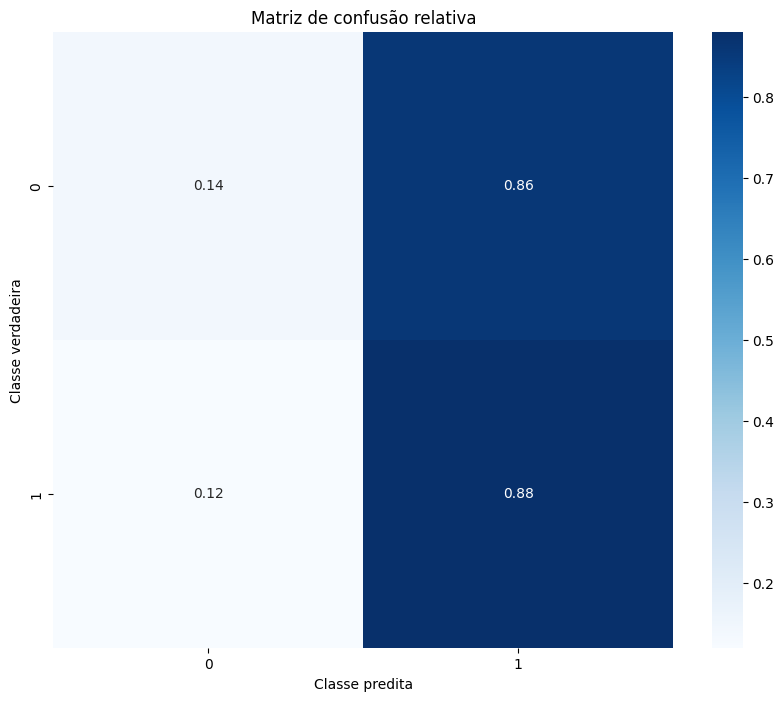

In [5]:
evaluate_metrics(y_test, p_test)